# <center> <b> <h1>   3. Permutation Test </h1></b></center>

In [31]:
import pickle

import pandas as pd
import itertools

import matplotlib.pyplot as plt
from sklearn.model_selection import permutation_test_score
import joblib

PATH_DATASETS = "../../2_Data_preparation/2_Split_Raw_Datasets/output/"
PATH_CLFS = "../1. linear regression (All features) and ranking/output/"
PATH_RANKINGS = "../1. linear regression (All features) and ranking/output/"

In [32]:
def readCsvs(split):
    datasets = []
    constant1 = 'X_'
    constant2 = '_' + split
    features = ['area', 'meancurv', 'thickness', 'volume']

    for feature in features:
        df = pd.read_csv(PATH_DATASETS + constant1 + feature + constant2 +'.csv', index_col=0)
        datasets.append({'name': feature, 'data': df})
    return datasets

In [33]:
def readClf():
    clfs = []
    features = ['area', 'meancurv', 'thickness', 'volume']
    
    constant = "logistic_regression (optimal)"
    PATH = PATH_CLFS
    
    for feature in features:
        clf = joblib.load(PATH + constant + feature + '.pkl')
        clfs.append({'name': feature, 'data': clf})
        
    return clfs

In [34]:
def readRankings_used(ranking = 0):
    datasets = []
    constants = ['used_regions_logistic_regression_',
                 '']    
    
    features = ['area', 'meancurv', 'thickness', 'volume']

    for feature in features:
        df = pd.read_csv(PATH_RANKINGS + constants[ranking] + feature +'.csv', index_col=0)
        datasets.append({'name': feature, 'data': df})
    return datasets

# 1. Data Preparing

In [35]:
df_X_tr = readCsvs('train')
df_X_tr[2]['data'].shape

(550, 148)

In [36]:
df_y_train = pd.read_csv(PATH_DATASETS + 'Y_train.csv', index_col = 0)
df_y_train.shape

(550, 1)

# 2. Normalize the data

In [37]:
for df_tr in df_X_tr:
    train = df_tr['data']
    normal_tr = (train - train.mean(axis=0))/train.std()
    df_tr['data'] = normal_tr

In [38]:
df_X_tr[0]['data'].head()

,lh_G_and_S_frontomargin_area,lh_G_and_S_occipital_inf_area,lh_G_and_S_paracentral_area,lh_G_and_S_subcentral_area,lh_G_and_S_transv_frontopol_area,lh_G_and_S_cingul-Ant_area,lh_G_and_S_cingul-Mid-Ant_area,lh_G_and_S_cingul-Mid-Post_area,lh_G_cingul-Post-dorsal_area,lh_G_cingul-Post-ventral_area,...,rh_S_parieto_occipital_area,rh_S_pericallosal_area,rh_S_postcentral_area,rh_S_precentral-inf-part_area,rh_S_precentral-sup-part_area,rh_S_suborbital_area,rh_S_subparietal_area,rh_S_temporal_inf_area,rh_S_temporal_sup_area,rh_S_temporal_transverse_area
414229,0.309576,0.224009,1.107822,1.264846,-0.053643,0.447702,0.977805,0.781809,-0.594180,-0.761092,...,0.221416,0.381852,-0.114597,1.444931,0.064915,-0.435619,-1.510187,-0.718114,-1.077114,-0.575371
541943,-0.076249,0.352958,-0.262869,0.412671,-0.728809,-0.994397,-0.892543,-0.132296,-1.093925,-0.695517,...,0.137165,3.971853,-0.980071,-0.602848,-1.391463,1.763449,-0.070073,1.569996,-1.101390,-0.732631
206525,1.821379,1.235757,0.221342,1.378470,0.139262,2.154329,0.479456,0.281038,-0.560107,1.577744,...,2.151850,1.750859,1.175570,-0.649815,1.331331,1.466642,1.690066,1.386581,2.638980,0.660251
146533,1.656025,0.933225,1.614382,-0.344818,0.310732,2.457255,1.002415,0.519500,-0.491960,0.054950,...,1.305682,0.006832,0.956788,-0.161354,2.071697,-0.044374,-0.431244,-0.846505,1.292596,-1.024687
194746,-0.918764,0.273605,-0.657688,-0.067072,-0.621640,-0.772536,-0.486481,0.137961,-0.491960,-0.476934,...,0.016284,0.451031,-0.143553,-0.969194,-0.388072,-1.069706,-0.536396,0.079744,-0.490755,-0.081122


# 3. Read CLFS

In [39]:
clfs = readClf()

# 4. Permutation test

In [40]:
def p_test_with_graph(X, y, clf, n_permutations = 10000, cv = 5):
    
    score, permutation_scores, pvalue = permutation_test_score(
        clf, X, y, scoring="accuracy", cv=cv, n_permutations=n_permutations, n_jobs=-1)

    print("Classification score %s (pvalue : %s)" % (score, pvalue))

    # #############################################################################
    # View histogram of permutation scores
    plt.hist(permutation_scores, 40, label='Permutation scores',
             edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [score], ylim, '--g', linewidth=3,
             label='Classification Score'
             ' (pvalue %s)' % pvalue)
    plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')

    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Score')
    plt.show()

permutation test logistic regression: area

Classification score 0.6963636363636364 (pvalue : 9.999000099990002e-05)


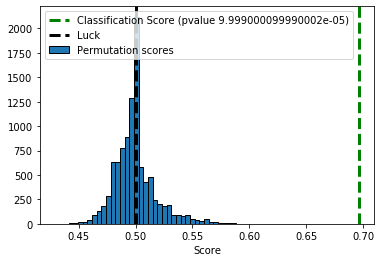

permutation test logistic regression: meancurv

Classification score 0.6436363636363637 (pvalue : 9.999000099990002e-05)


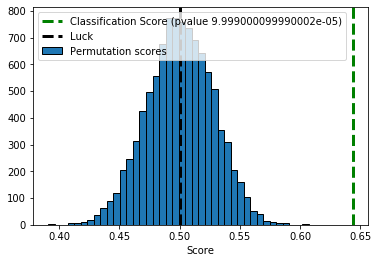

permutation test logistic regression: thickness

Classification score 0.6854545454545454 (pvalue : 9.999000099990002e-05)


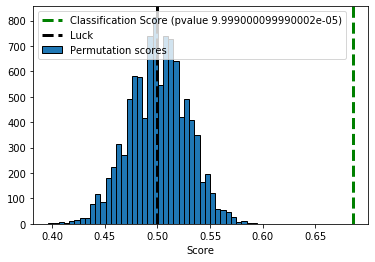

permutation test logistic regression: volume

Classification score 0.7036363636363636 (pvalue : 9.999000099990002e-05)


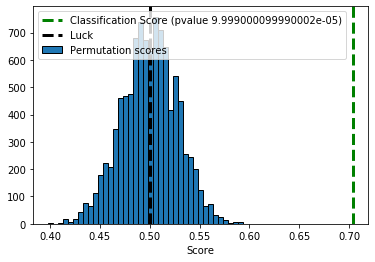

In [41]:
for feature, clf in zip(df_X_tr, clfs):
    
    data = feature['data']
    name = feature['name']
    
    logistic_regression = clf['data']
    
    print("permutation test logistic regression: " + name+'\n')
    p_test_with_graph(data,
                      df_y_train['class'].values,
                      logistic_regression)